# NumPy and Pandas Tutorial
## HODP Bootcamp Week 4
### February 28, 2018

## Last time we . . . 
* Learned how to use Jupyter Notebook
* Learned some Python
    - datatypes (strings, integers)
    - functions
    - data structures like lists and dictionaries
* Used Python to analyze concentration data

## This week:
* Learn how to use Python libraries numpy and pandas to make data analysis easy and efficient
* Understand key differences between Python, NumPy, Pandas, and more traditional tools like Google Sheets
* Practice your new data science skills!

## Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

## Python vs. NumPy
* Python lists are flexible, but bugs can be tough to find and for-loops to manipulate data can be slow
* NumPy arrays have fixed types and functions can be __vectorized__ and operations can be __broadcast__ across arrays

In [2]:
lst = ["Emma", "Jeffrey", 1, 2] # This is a valid Python list
lst

['Emma', 'Jeffrey', 1, 2]

In [3]:
np_lst = np.array(lst) # Numpy forces them all to be strings
np_lst

array(['Emma', 'Jeffrey', '1', '2'],
      dtype='<U7')

In [4]:
for elt in lst:
    print(elt + " 4")

Emma 4
Jeffrey 4


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [5]:
for elt in np_lst:
    print(elt + " is fun")

Emma is fun
Jeffrey is fun
1 is fun
2 is fun


## Creating NumPy arrays

First, we can use ``np.array`` to create arrays from Python lists:

In [6]:
# integer array:
np.array([1, 4, 2, 5, 3])

array([1, 4, 2, 5, 3])

Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type.
If types do not match, NumPy will upcast if possible (here, integers are up-cast to floating point):

In [7]:
np.array([3.14, 4, 2, 3]) # Notice how the elements in the resulting array are all floats

array([ 3.14,  4.  ,  2.  ,  3.  ])

In [8]:
np.array([1, 2, 3, 4], dtype='float32') # You can explicitly set the type with the dtype keyword

array([ 1.,  2.,  3.,  4.], dtype=float32)

Numpy has a bunch of handy built-in functions to generate arrays:

In [9]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [11]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [12]:
# Create a 3x3 array of uniformly distributed random values between 0 and 1
np.random.random((3, 3))

array([[ 0.03046076,  0.47689936,  0.76566072],
       [ 0.90424662,  0.0668741 ,  0.61246174],
       [ 0.20580938,  0.99148962,  0.92304126]])

In [13]:
# Create a 3x3 array of normally distributed random values with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 1.01793428,  0.13368545, -0.38808249],
       [-2.05232093,  1.24900217,  0.75582063],
       [ 1.12686621, -2.20156675, -1.1527615 ]])

## Rule of Thumb: Don't reinvent the wheel
Google if a function already exists that does what you want

## So, how is this useful for data analysis?

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the __mean__ and __standard deviation__, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

In [14]:
big_array = np.random.rand(1000000)
%timeit -n 10 sum(big_array)
%timeit -n 10 np.sum(big_array)

78.1 ms ± 4.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
407 µs ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Some more handy features of NumPy:

One common type of aggregation operation is an aggregate along a row or column.

Say you have some data stored in a two-dimensional array:

In [15]:
M = np.random.random((3, 4))
print(M)

[[ 0.08140188  0.28114077  0.95768854  0.33538014]
 [ 0.09431977  0.74492574  0.94216626  0.95327674]
 [ 0.66245297  0.84996413  0.33538085  0.28467867]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [16]:
M.min()

0.08140188002596771

But what if you want the min for each row or each column?

In [17]:
M.min(axis=0)

array([ 0.08140188,  0.28114077,  0.33538085,  0.28467867])

In [18]:
M.min(axis=1)

array([ 0.08140188,  0.09431977,  0.28467867])

### Other aggregation functions

Most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special floating-point ``NaN`` value.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

## Pandas

* Pandas is another useful library for data analysis.
* While NumPy is really useful for math, it relies on __arrays__ of specific datatypes (ints, floats, etc).
* Pandas uses two data structures: `Series` and `DataFrame` that are designed to package lots of different types of data similar to a spreadsheet.
* It combines the functionality of Python and NumPy with the ease of use of Google Sheets.

## Example: House Rankings

We will:
1. Read in the data
2. Manipulate the data into a more useable form
3. Analyze the data
4. Plot our results

### Reading in the data

It's super easy to use Pandas to read in data from csv files:

In [89]:
rankings = pd.read_csv("house_rankings.csv")

And it looks beautiful:

In [90]:
rankings.set_index("House", inplace=True)
rankings

,1,2,3,4,5,6,7,8,9,10,11,12
House,,,,,,,,,,,,
Adams,24,32,34,37,51,45,42,36,26,20,28,44
Cabot,16,17,31,24,18,23,24,23,41,57,86,59
Currier,19,24,20,22,23,25,18,25,34,61,71,77
Dunster,41,84,62,45,49,35,38,20,22,8,12,3
Eliot,27,39,40,42,49,39,34,47,37,18,29,18
Kirkland,16,21,24,46,39,52,41,52,41,42,22,23
Leverett,12,31,40,44,40,51,58,51,41,31,13,7
Lowell,16,27,28,38,41,43,43,39,38,32,29,45
Mather,21,13,18,24,26,21,34,47,61,26,52,76


### Manipulating the data

It may be useful to also have this data in a NumPy array so we can use some of the NumPy aggregate functions to analyze our data (although Pandas also has its own version of these functions).  It's easy to convert between types:

In [91]:
rankings.values

array([[ 24,  32,  34,  37,  51,  45,  42,  36,  26,  20,  28,  44],
       [ 16,  17,  31,  24,  18,  23,  24,  23,  41,  57,  86,  59],
       [ 19,  24,  20,  22,  23,  25,  18,  25,  34,  61,  71,  77],
       [ 41,  84,  62,  45,  49,  35,  38,  20,  22,   8,  12,   3],
       [ 27,  39,  40,  42,  49,  39,  34,  47,  37,  18,  29,  18],
       [ 16,  21,  24,  46,  39,  52,  41,  52,  41,  42,  22,  23],
       [ 12,  31,  40,  44,  40,  51,  58,  51,  41,  31,  13,   7],
       [ 16,  27,  28,  38,  41,  43,  43,  39,  38,  32,  29,  45],
       [ 21,  13,  18,  24,  26,  21,  34,  47,  61,  26,  52,  76],
       [ 21,  23,  28,  16,  20,  21,  31,  28,  44,  93,  50,  44],
       [ 34,  42,  56,  51,  40,  47,  38,  36,  24,  23,  20,   8],
       [172,  66,  38,  30,  23,  17,  18,  15,  10,   8,   7,  15]])

We can also splice this array to just get the values for the first column or row:

In [94]:
rankings.values[:, 0]

array([ 24,  16,  19,  41,  27,  16,  12,  16,  21,  21,  34, 172])

In [95]:
rankings.values[0,:]

array([24, 32, 34, 37, 51, 45, 42, 36, 26, 20, 28, 44])

### Analyzing the data

 First, how many students filled out the survey?

In [96]:
n = rankings.sum(axis=1)[0]
print(n)

419


Which house was the most popular? The least popular?

In [99]:
rankings.iloc[:, 0].argmax()

'Winthrop'

In [100]:
rankings.iloc[:, 11].argmax()

'Currier'

Make a `DataFrame` with the percentage of first place rankings for each house.

In [102]:
rankings.iloc[:,0] / n * 100

House
Adams           5.727924
Cabot           3.818616
Currier         4.534606
Dunster         9.785203
Eliot           6.443914
Kirkland        3.818616
Leverett        2.863962
Lowell          3.818616
Mather          5.011933
Pforzheimer     5.011933
Quincy          8.114558
Winthrop       41.050119
Name: 1, dtype: float64

Make a `DataFrame` with the average ranking for each house.

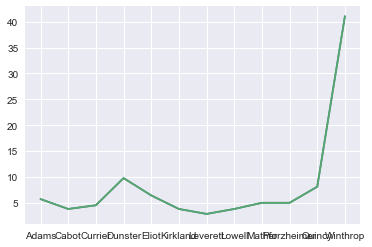

In [108]:
plt.plot(rankings.iloc[:,0] / n * 100)
plt.show()